# CNN Model Training

In [ ]:
# get working directory
import os, sys
sys.path.append(os.path.abspath('..'))

# import modules
from scripts.cnn_model import *
from scripts.resnet18_model import * 
from scripts.model_evaluation import *


In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data()
train_loader, val_loader, test_loader = create_dataloaders(X_train, y_train, X_val, y_val, X_test, y_test)

In [3]:
# initiate model
model = MusicGenreCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [4]:
# train and evaluate model
train_losses, val_losses, train_accs, val_accs = train_model(model, train_loader, val_loader, criterion, optimizer)
preds, labels = evaluate_model(model, test_loader, criterion)

Epoch 1/50, Train Loss: 2.1166, Train Acc: 0.2227, Val Loss: 1.5626, Val Acc: 0.4264
Epoch 2/50, Train Loss: 1.5513, Train Acc: 0.4298, Val Loss: 1.3449, Val Acc: 0.5170
Epoch 3/50, Train Loss: 1.3813, Train Acc: 0.5016, Val Loss: 1.2045, Val Acc: 0.5846
Epoch 4/50, Train Loss: 1.2710, Train Acc: 0.5485, Val Loss: 1.1641, Val Acc: 0.5906
Epoch 5/50, Train Loss: 1.1942, Train Acc: 0.5781, Val Loss: 1.0707, Val Acc: 0.6211
Epoch 6/50, Train Loss: 1.0948, Train Acc: 0.6196, Val Loss: 0.9426, Val Acc: 0.6877
Epoch 7/50, Train Loss: 1.0447, Train Acc: 0.6359, Val Loss: 0.8852, Val Acc: 0.7182
Epoch 8/50, Train Loss: 0.9913, Train Acc: 0.6557, Val Loss: 0.8764, Val Acc: 0.7127
Epoch 9/50, Train Loss: 0.9429, Train Acc: 0.6708, Val Loss: 0.7895, Val Acc: 0.7377
Epoch 10/50, Train Loss: 0.9028, Train Acc: 0.6895, Val Loss: 0.7713, Val Acc: 0.7457
Epoch 11/50, Train Loss: 0.8670, Train Acc: 0.7043, Val Loss: 0.7351, Val Acc: 0.7673
Epoch 12/50, Train Loss: 0.8401, Train Acc: 0.7107, Val Loss: 0

# Model Evaluation

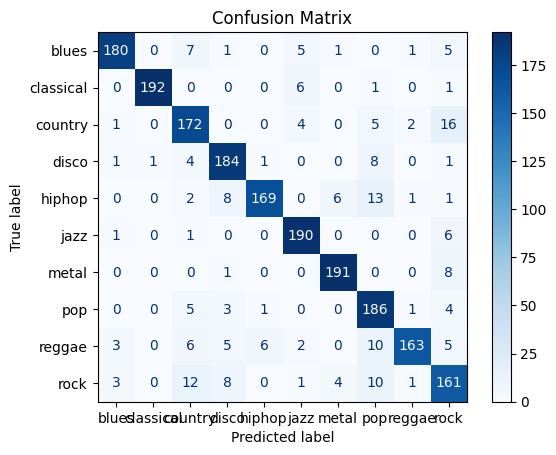

In [5]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
plot_confusion_matrix(labels, preds, genres)

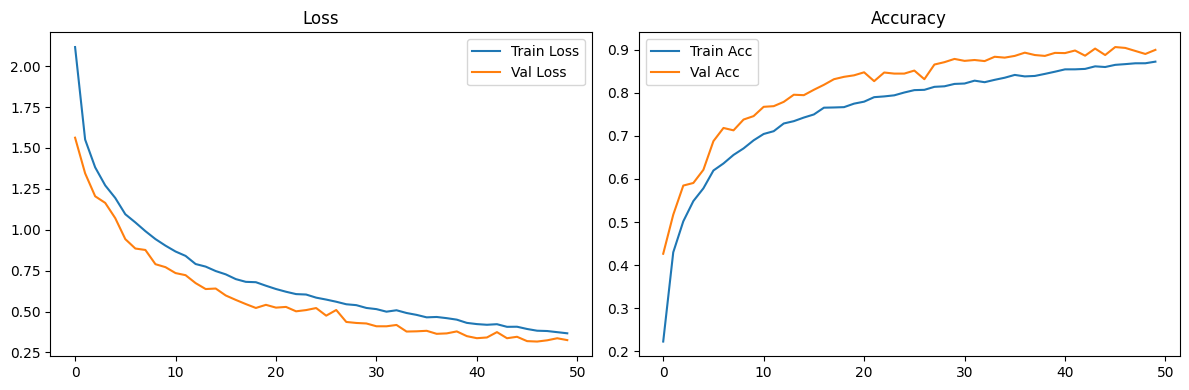

In [6]:
plot_training_curves(train_losses, val_losses, train_accs, val_accs)


Evaluation Metrics Comparison:
Metric       Validation (%)  Test (%)       
------------------------------------------
Accuracy     89.94           89.49          
Precision    90.33           89.97          
Recall       89.94           89.50          
F1 Score     89.94           89.56          


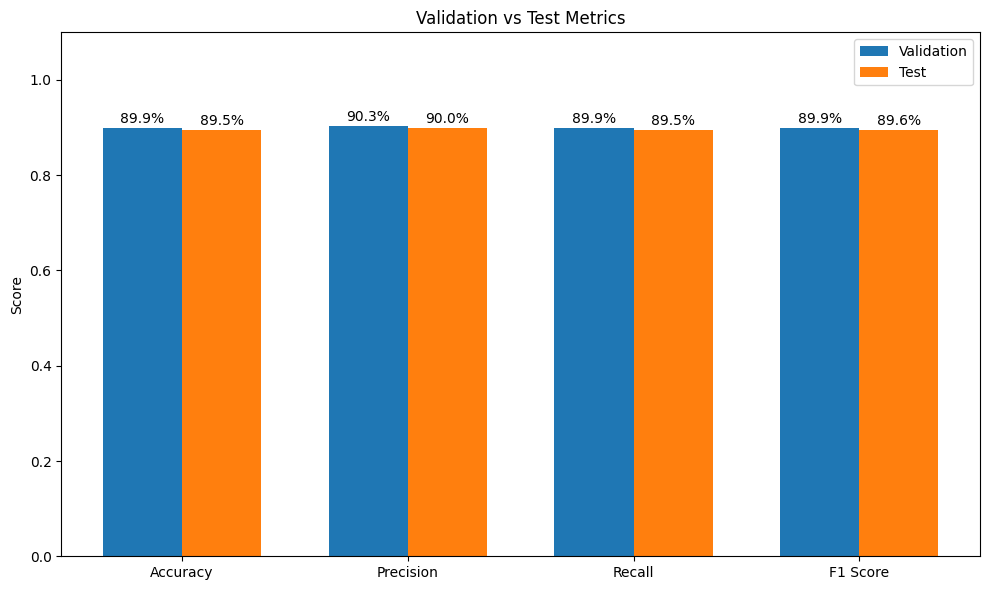

In [24]:
val_metrics, test_metrics = evaluate_and_compare(model, val_loader, test_loader, criterion, class_names=genres)

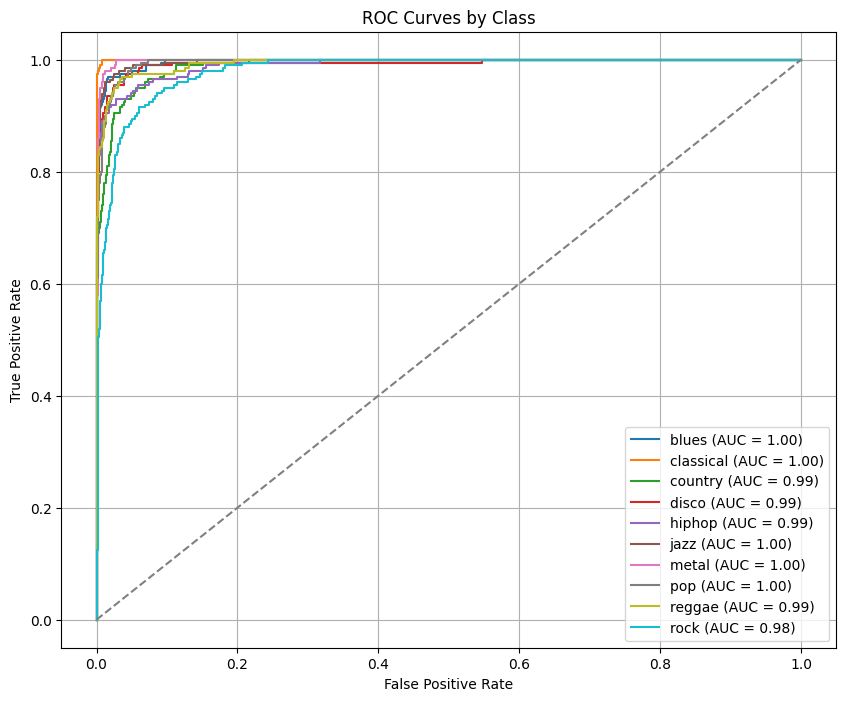

In [25]:
plot_roc_auc(test_metrics['labels'], test_metrics['probs'], num_classes=10, class_names=genres)

In [7]:
save_model(model)

Model saved as ../models/music_genre_cnn.pth


## Resnet Model

In [8]:
train_loader_resnet, val_loader_resnet, test_loader_resnet = load_data_resnet()

In [9]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
model_resnet = create_model_resnet(num_classes=len(genres))

c:\Users\liulj\Desktop\AI\audio-classification\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\liulj\Desktop\AI\audio-classification\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [10]:
train_losses_resnet, val_losses_resnet, train_accs_resnet, val_accs_resnet = train_model_resnet(model_resnet, train_loader_resnet, val_loader_resnet)

Epoch 1/50 - Train Loss: 0.9260, Train Acc: 0.6725, Val Loss: 1.8989, Val Acc: 0.4660
Epoch 2/50 - Train Loss: 0.5070, Train Acc: 0.8214, Val Loss: 1.9938, Val Acc: 0.4910
Epoch 3/50 - Train Loss: 0.3311, Train Acc: 0.8851, Val Loss: 0.9188, Val Acc: 0.7558
Epoch 4/50 - Train Loss: 0.2172, Train Acc: 0.9235, Val Loss: 0.2328, Val Acc: 0.9149
Epoch 5/50 - Train Loss: 0.1543, Train Acc: 0.9464, Val Loss: 0.3705, Val Acc: 0.8819
Epoch 6/50 - Train Loss: 0.1161, Train Acc: 0.9608, Val Loss: 0.3688, Val Acc: 0.8844
Epoch 7/50 - Train Loss: 0.0950, Train Acc: 0.9663, Val Loss: 0.3210, Val Acc: 0.8989
Epoch 8/50 - Train Loss: 0.0768, Train Acc: 0.9742, Val Loss: 1.6316, Val Acc: 0.6887
Epoch 9/50 - Train Loss: 0.0806, Train Acc: 0.9742, Val Loss: 0.3321, Val Acc: 0.8994
Epoch 10/50 - Train Loss: 0.0491, Train Acc: 0.9832, Val Loss: 1.1521, Val Acc: 0.7853
Epoch 11/50 - Train Loss: 0.0547, Train Acc: 0.9824, Val Loss: 0.4994, Val Acc: 0.8589
Epoch 12/50 - Train Loss: 0.0512, Train Acc: 0.9815,

In [11]:
torch.save(model_resnet.state_dict(), '../models/music_genre_resnet18.pth')
print('Model saved as music_genre_resnet18.pth')


Model saved as music_genre_resnet18.pth


## Model Evauation

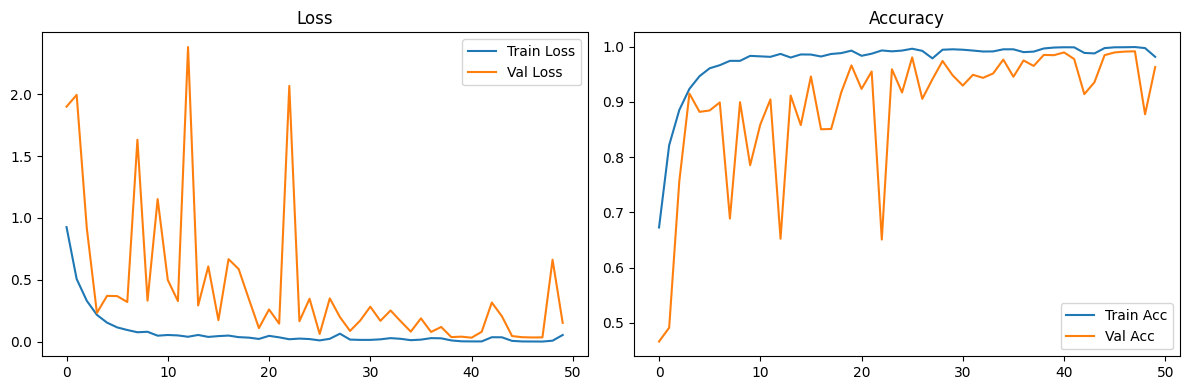

In [13]:
plot_training_curves_resnet(train_losses_resnet, val_losses_resnet, train_accs_resnet, val_accs_resnet)


Evaluation Metrics:
Accuracy:  0.9680
Precision: 0.9687
Recall:    0.9680
F1 Score:  0.9680
AUC Score: 0.9822079274390176


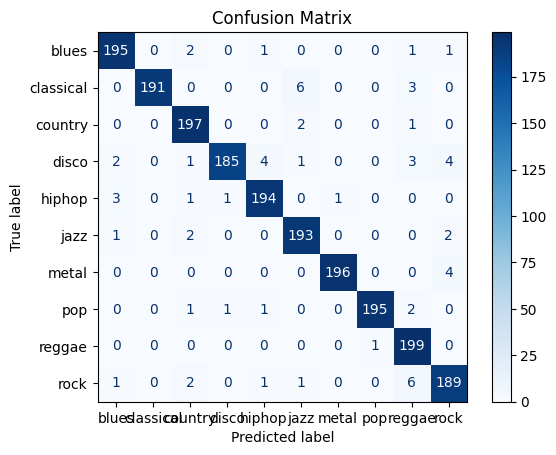

In [14]:
evaluate_model_metrics_resnet(model_resnet, test_loader_resnet)


Evaluation Metrics Comparison:
Metric       Validation (%)  Test (%)       
------------------------------------------
Accuracy     96.30           96.80          
Precision    96.39           96.87          
Recall       96.30           96.80          
F1_score     96.29           96.80          


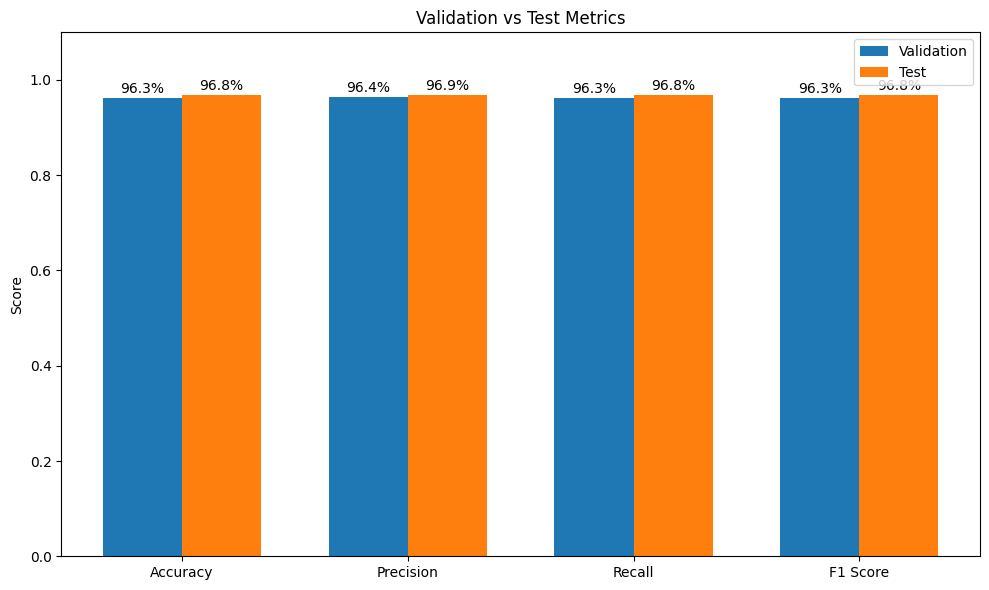

In [29]:
val_metrics_resnet, test_metrics_resnet = evaluate_and_compare_resnet(model_resnet, val_loader_resnet, test_loader_resnet, criterion, class_names=genres)

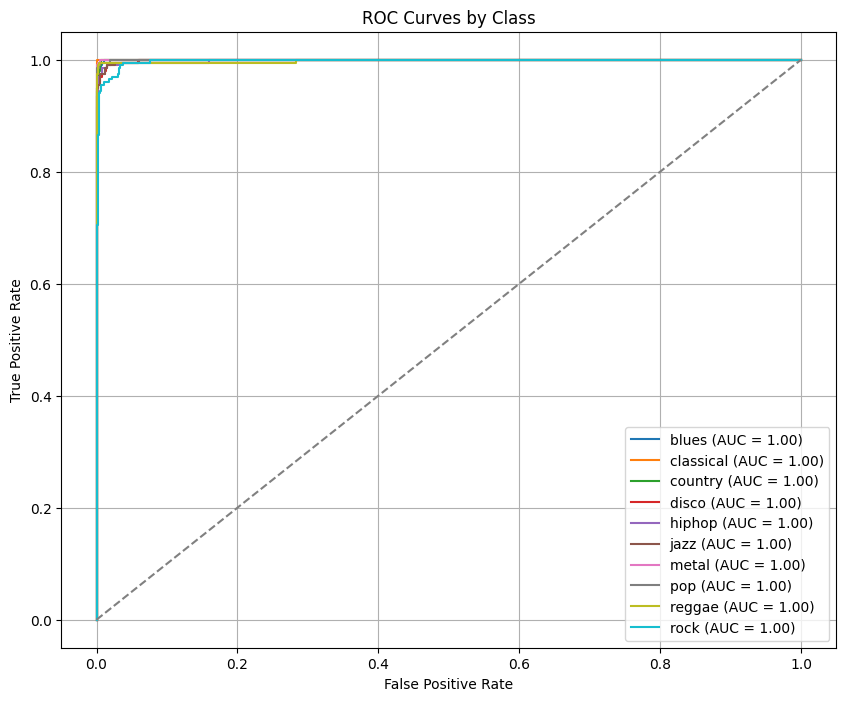

In [30]:
plot_roc_auc_resnet(test_metrics_resnet['labels'], test_metrics_resnet['probs'], num_classes=10, class_names=genres)